In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
df = pd.read_csv("fraudTest.csv")

In [ ]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-15-d5842cbc8f12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-15-d5842cbc8f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

2.) Make three sets of training data(Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

In [ ]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

3.) Train three logistic regression models

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

4.) Test the three models

In [ ]:
over_log.score(X_test, y_test)

0.9199716883802395

In [ ]:
under_log.score(X_test, y_test)

0.9183041819621393

In [ ]:
smote_log.score(X_test, y_test)

0.9143813431224358

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = y_test

In [ ]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76442,  6598],
       [   73,   245]])

In [ ]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7704402515723271


In [ ]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76302,  6738],
       [   72,   246]])

In [ ]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7735849056603774


In [ ]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75976,  7064],
       [   73,   245]])

In [ ]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7704402515723271


6.) Pick two features and plot the two classes before and after SMOTE.

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
raw_temp = pd.concat([X_train, y_train], axis =1)

In [ ]:
raw_temp.columns = list(X.columns) + ["is_fraud"]

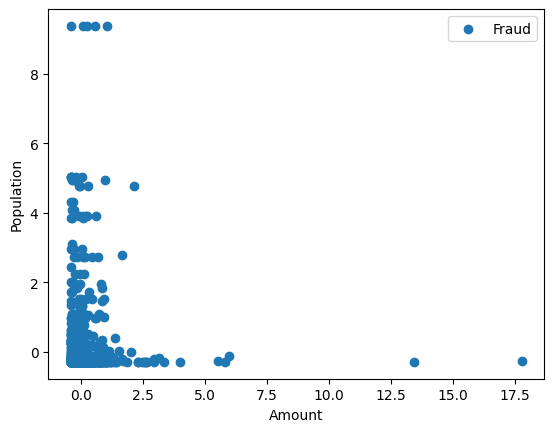

In [ ]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [ ]:
smote_X = pd.DataFrame(smote_X)
smote_y = pd.DataFrame(smote_y)

In [ ]:
raw_temp = pd.concat([smote_X, smote_y], axis =1)

In [ ]:
raw_temp.columns = list(X.columns) + ["is_fraud"]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


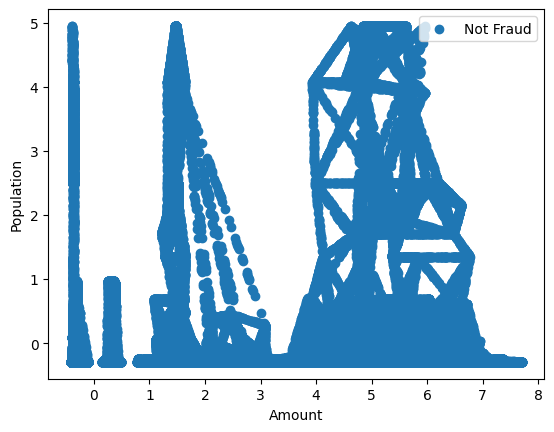

In [ ]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).
Make a dataframe that has a dual index and 9 Rows.
Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
Choose what you think is the best model and why. test on Holdout

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty = "l1", C = .5, solver = "liblinear"), # C is the inverse of the regularization strength, the regularization strength is also known as lambda
    "DicisionTree" : DecisionTreeClassifier()
}

In [ ]:
trained_models = {}

In [ ]:

def calc_perf_metrics(y_true, y_pred):


    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    print(f"Precision : {tp / (tp + fp)}")
    print(f"Recall : {tp / (tp + fn)}")
    print(f"F1 Score : {2 * (tp / (tp + fp) * tp / (tp + fn)) / (tp / (tp + fp) + tp / (tp + fn))}")

In [ ]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_name, model in model_configs.items():
        combined_key = f"{resample_key}_{model_name}"
        trained_models[combined_key] = model.fit(resample_X, resample_y)

        print(f"{combined_key} : {trained_models[combined_key].score(X_test, y_test)}")
        y_pred = trained_models[combined_key].predict(X_test)
        y_true = y_test
        calc_perf_metrics(y_true, y_pred)
        print("\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


over_LOG : 0.9163127714196598
Precision : 0.0342753217683268
Recall : 0.7704402515723271
F1 Score : 0.06563085989820518





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


over_LASSO : 0.9163607572158641
Precision : 0.03429451287793953
Recall : 0.7704402515723271
F1 Score : 0.06566604127579738



over_DicisionTree : 0.9970848628805874
Precision : 0.6245847176079734
Recall : 0.5911949685534591
F1 Score : 0.6074313408723748



under_LOG : 0.8921159336836296
Precision : 0.027041762076109477
Recall : 0.779874213836478
F1 Score : 0.052271050690272956



under_LASSO : 0.8958588257875669
Precision : 0.02799413026300937
Recall : 0.779874213836478
F1 Score : 0.05404816388798083



under_DicisionTree : 0.9432567959883874
Precision : 0.05968063872255489
Recall : 0.940251572327044
F1 Score : 0.11223723723723725





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


smote_LOG : 0.9142733750809761
Precision : 0.033479092648264555
Recall : 0.7704402515723271
F1 Score : 0.06416972236773179





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


smote_LASSO : 0.9142853715300271
Precision : 0.03348366817001503
Recall : 0.7704402515723271
F1 Score : 0.06417812704649639



smote_DicisionTree : 0.9924902228940233
Precision : 0.30256410256410254
Recall : 0.7421383647798742
F1 Score : 0.429872495446266





I will choose the over_DicisionTree model, because it has the highest F1 score.

